<a href="https://colab.research.google.com/github/jimmynewland/colabnotebooks/blob/main/Ball_Toss_Data_Investigation_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using CS and DS to Learn Science

Bringing both computation and data science tools together in a domain-specific context can actually help students learn the content from the specific subject while building efficacy in the other areas.

The goal is to make sure the computer science and data science tools do not increase the cognitive load so much that learning the specific domain knowledge is negatively impacted.

In [1]:
#@title Import Libraries
import pandas as pd # pandas is a data science libary
import matplotlib.pyplot as plt # standard plotting librar

##Tidy Data

This dataset came from tracking the horizontal and vertical position of a ball thrown in an arc.

This dataset is 'tidy' because it is ready to plot with no strange or missing values and clearly identified column names.

How many columns do we have in the dataset? What sort of data is it? If it matters, do we know what the units might be?

We are using pandas which is a very common tool for handling tabular data.

This is an attempt to bring good data science pedagogy to bear on learning the basics of motion.

The statistical problem solving cycle:
* Ask a question that needs data and some stats to answer
* Collect new or existing data that can used towards getting the answer
* Assess, clean, and organize the data to find a way to get at the answer
* Analyze the data using the appropriate computational and statistical tools
* Visualize and interpret the data to tell a story that addresses the question


##What questions should we answer?

Our questions:
* Is this ball going the same speed the whole time along the arc?
* How is motion parallel to the ground different than the motion perpendicular to the ground?
* Can we find a way to measure the gravitational acceleration, $g$?

In [2]:
#@title Load Position, Time, and Speed Data
df = pd.read_csv("http://thinkingwithcode.com/datascience/hous-coding-ball-toss-data.csv")
df.head()

,t (s),x (m),y (m),vy (m/s)
0,0.0333,0.0534,0.081,2.180
1,0.0667,0.1060,0.148,1.870
2,0.1000,0.1590,0.206,1.570
3,0.1330,0.2120,0.253,1.260
4,0.1670,0.2650,0.289,0.949


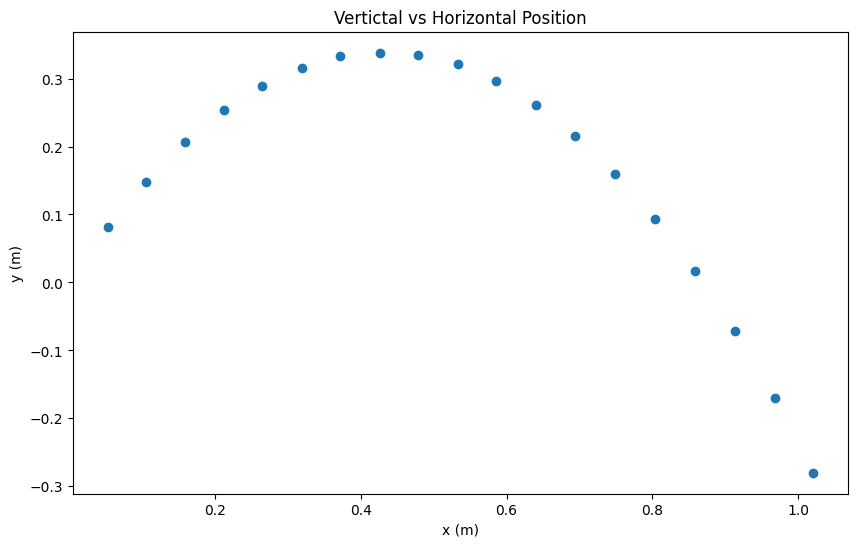

In [3]:
#@title Plot the Horizontal Position vs Vertical Position
x_axis = df['x (m)']
y_axis = df['y (m)']

plt.figure(figsize=(10, 6))
plt.title("Vertictal vs Horizontal Position")

plt.xlabel("x (m)")
plt.ylabel("y (m)")

plt.scatter(x_axis,y_axis)

plt.show()

## Y vs X is not helpful for us...
Note that plotting the horizontal positions on the x-axis and the vertical positions on the y-axis does not produce a plot that helps us answer our questions.

We are going to need a position versus time plot for both the horizontal data and the vertical data.

First, let's follow good CS pedagogy and make a function instead of just copying and pasting code over and over.

In [4]:
#@title makePlot function
def makePlot(xAxisLabel: str, yAxisLabel: str, title: str):
  """Plot a scatter graph.

    Keyword arguments:
    xAxisLabel -- Exact name (str) of the x-axis data column
    yAxisLabel -- Exact name (str) of the y-axis data column
    title -- Label (str) for the graph title
  """
  x_axis = df[xAxisLabel]
  y_axis = df[yAxisLabel]

  plt.figure(figsize=(10, 6))
  plt.title(title)
  plt.xlabel(xAxisLabel)
  plt.ylabel(yAxisLabel)

  plt.scatter(x_axis,y_axis)

  plt.show()

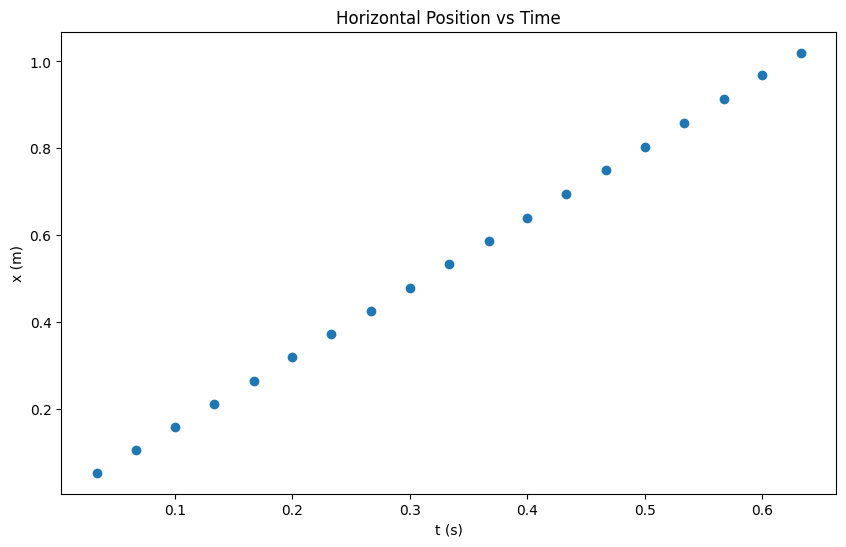

In [5]:
#@title Plot the Horizontal Position vs Time
makePlot('t (s)', 'x (m)', 'Horizontal Position vs Time')

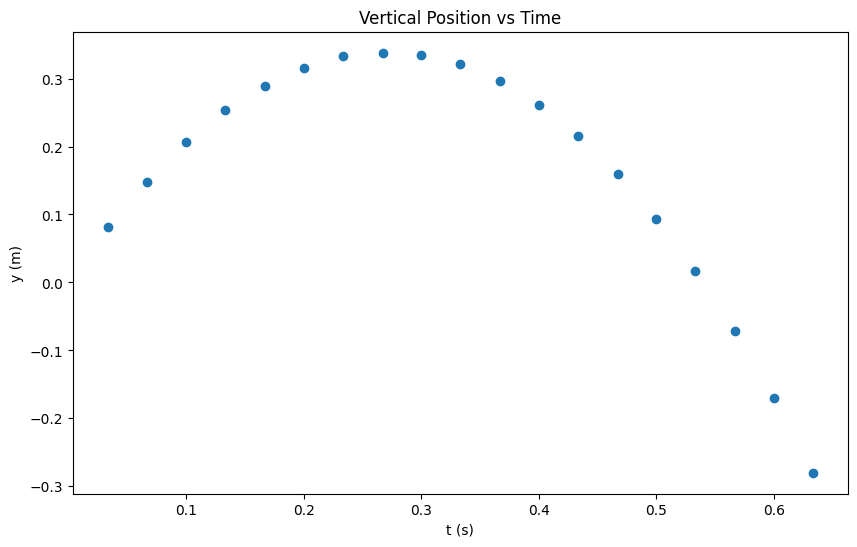

In [6]:
#@title Plot the Vertical Position vs Time
makePlot('t (s)', 'y (m)', 'Vertical Position vs Time')

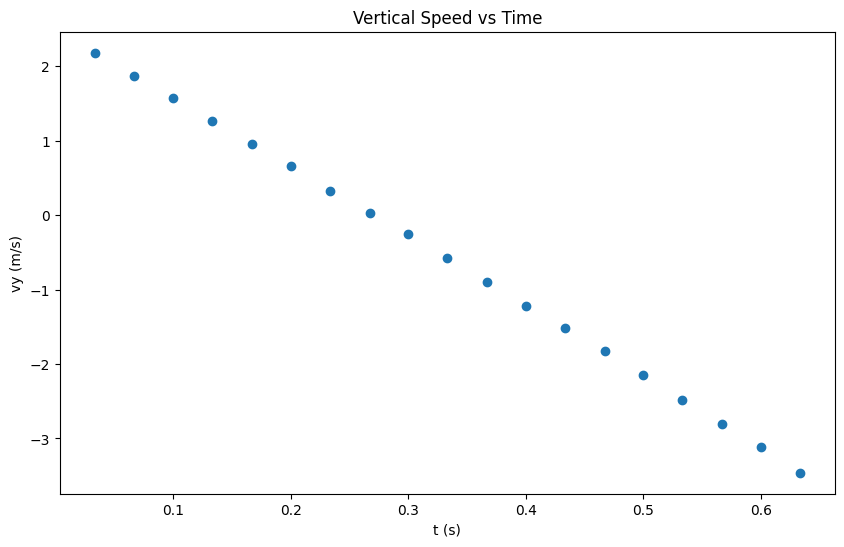

In [7]:
#@title Plot the Vertical Speed vs Time
makePlot('t (s)', 'vy (m/s)', 'Vertical Speed vs Time')

#Inference with Statistics

##Linear Regression - Finding Meaning with Slopes

When learning motion, slopes of motion graphs can help describe actual physical parameters of a system.

For example, if we plot position on the vertical axis and time on the horizontal axis and we get a line, then the slope of that line is the speed of the object.

<img src="https://thinkingwithcode.com/datascience/constant_speed.png" width="650">

How can we use a common data science tool, the linear regression, to estimate the slope of a line?

We can use the `scipy.stats` application programming interface (API) to to perform a linear regression on the horizontal position versus time data from our pandas dataframe.

The `lingress` function returns 5 things, in this order:
* slope estimate
* intercept estimate
* correlation coefficient (r-value)
* significance measure (p-value)
* standard error

Once we get the slope, we can interpret the meaning. For an example where position is on the vertical axis and time is on the horizontal axis, the slope of that line is the constant speed of the object.

What physical meaning might the vertical intercept have in this example?

A note about uncertainty: it is common to report the uncertainty in a measurement using the standard error. That means we report the `value ±  std_err` in the same units as the slope.

In [8]:
from scipy.stats import linregress

t = df['t (s)']
x = df['x (m)']
vy = df['vy (m/s)']

vx, intercept1, r_value1, p_value1, std_err1 = linregress(t,x) # slope is vx
ay, intercept2, r_value2, p_value2, std_err2 = linregress(t, vy) # slops is ay

In [9]:
print(f'vx = {vx:.2f} ± {std_err1:.2f} (m/s)')
print(f'ay = {ay:.2f} ± {std_err2:.2f} (m/s^2)')

vx = 1.61 ± 0.00 (m/s)
ay = -9.36 ± 0.03 (m/s^2)


##Let's answer our questions (double click in this box to type)

Our questions:
* Is this ball going the same speed the whole time along the arc?
* How is motion parallel to the ground different than the motion perpendicular to the ground?
* Can we find a way to measure the gravitational acceleration, $g$?

##License Information
Video data [courtesy of Open Source Physics](https://opensourcephysics.github.io/tracker-website/download/mechanics_videos.zip).

This activity was created by <a href="http://jimmynewland.com/">Dr. J. Newland</a>. It was last updated on 2025-10-04.

<a href="https://thinkingwithcode.com/datascience/balltoss.php">Ball Toss Data Science Example</a> © 2025 by <a href="https://jimmynewland.com">James Newland</a> is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND 4.0</a>

<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/by.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/nc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/nd.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;">